### Importing required libraries

In [575]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading Data

In [576]:

csv_file_path = r'C:\Users\Madham Vinay\Downloads\day.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df1=df

print(df.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Dropping instant,dteday,casual,registered columns

In [578]:
df=df.drop('instant', axis=1)
df=df.drop('dteday', axis=1)
df.drop(['casual','registered'],axis=1,inplace=True)

#Chnaging type of season, weathersit, mnth, weekday to category and creating temp colmns

In [579]:
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')

In [580]:
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [581]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,...,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.336986,0.028767
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,...,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 ## Plotting linear data

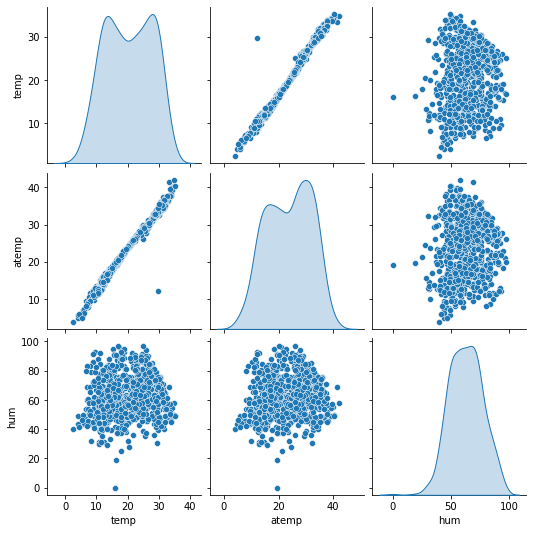

In [582]:
bike_num=df[[ 'temp', 'atemp', 'hum']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

## Plotting categriocal data

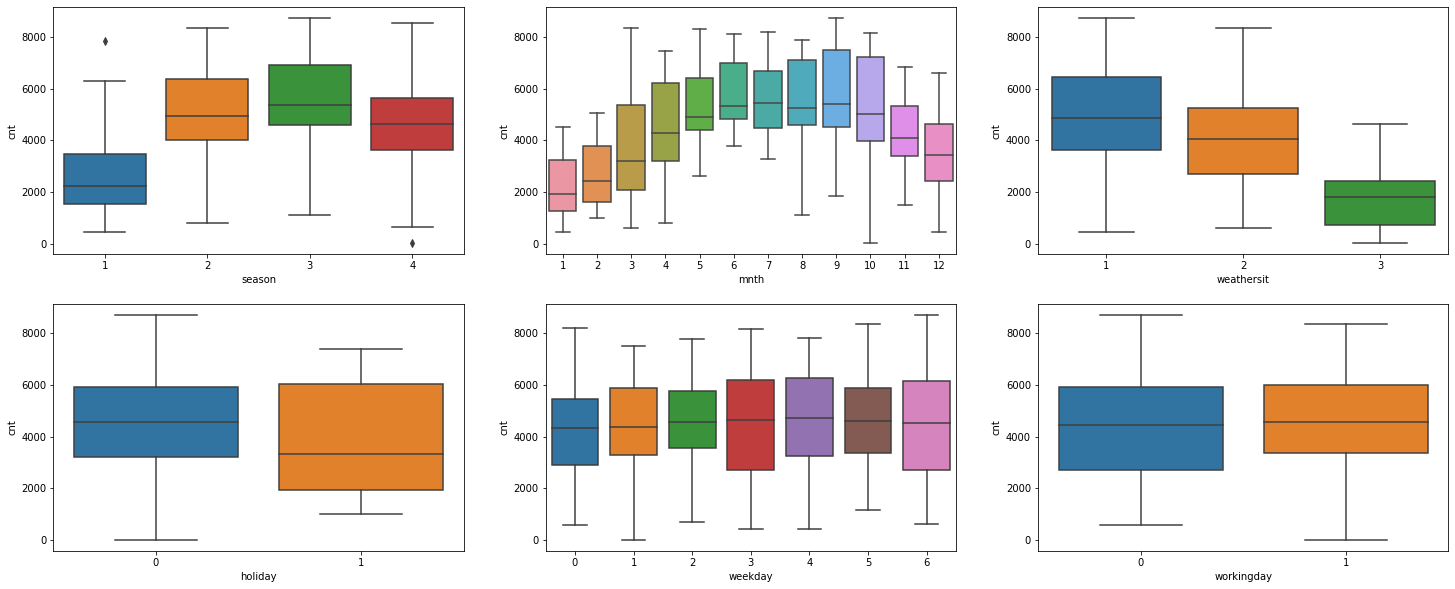

In [583]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df1)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df1)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df1)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df1)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df1)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df1)
plt.show()

In [584]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,...,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.336986,0.028767
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,...,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


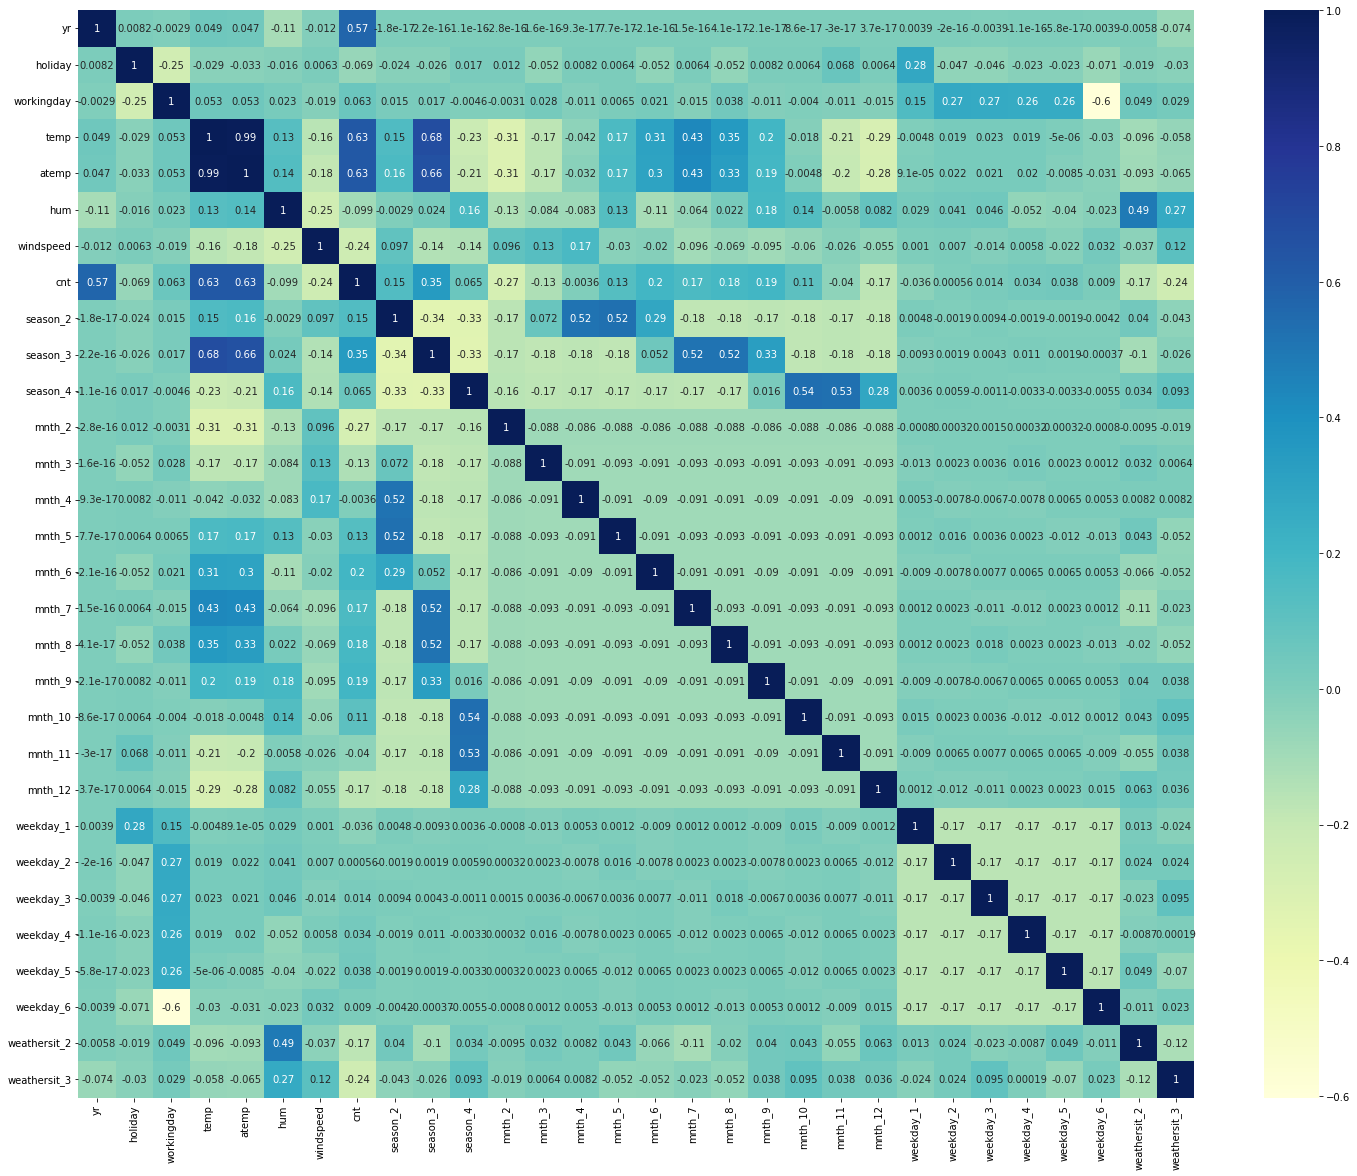

In [585]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

 ## Sacling data 

In [586]:
scaler = MinMaxScaler()
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [587]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [588]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df[num_vars] = scaler.fit_transform(df[num_vars])

In [589]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.355170,0.373517,0.828620,0.284606,0.110792,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0.379232,0.360541,0.715771,0.466215,0.089623,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.152669,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.177174,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.181546,0,0,...,0,0,0,0,1,0,0,0,0,0


### Mapping X and y values

In [590]:
y=df['cnt']
X=df.drop('cnt', axis=1)
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,0.543852,0.519090,0.645400,0.346568,0.516108,0.252055,0.257534,...,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.336986,0.028767
std,0.500343,0.167266,0.465405,0.228140,0.213968,0.146402,0.159873,0.222735,0.434490,0.437576,...,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.473004,0.167266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346084,0.339611,0.534704,0.232045,0.362143,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.548307,0.535942,0.643959,0.326928,0.520766,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743261,0.695494,0.750535,0.434629,0.683847,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [591]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     96.02
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.78e-177
Time:                        07:44:47   Log-Likelihood:                 523.47
No. Observations:                 511   AIC:                            -988.9
Df Residuals:                     482   BIC:                            -866.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1790      0.033      5.498      0.000       0.115       0.243
yr               0.2247      0.008     27.567      0.000       0.209       0.241
holiday         -0.0347      0.023     -1.508      0.132      -0.080       0.011
workingday       0.0368      0.009      3.976      0.000       0.019       0.055
temp             0.1887      0.257      0.733      0.464      -0.317       0.694
atemp            0.2510      0.264      0.951      0.342      -0.268       0.770
hum             -0.1584      0.039     -4.014      0.000      -0.236      -0.081
windspeed       -0.1316      0.030     -4.316      0.000      -0.191      -0.072
season_2         0.1511      0.028      5.438      0.000       0.096       0.206
season_3         0.1402      0.031      4.514      0.000       0.079       0.201
season_4         0.2135      0.026      8.081      0.000       0.162       0.265
mnth_2           0.0143      0.020      0.709      0.479      -0.025       0.054
mnth_3           0.0513      0.025      2.055      0.040       0.002       0.100
mnth_4          -0.0041      0.036     -0.115      0.908      -0.074       0.066
mnth_5           0.0274      0.038      0.716      0.474      -0.048       0.103
mnth_6          -0.0015      0.041     -0.036      0.971      -0.081       0.078
mnth_7          -0.0427      0.044     -0.975      0.330      -0.129       0.043
mnth_8          -0.0119      0.043     -0.277      0.782      -0.096       0.072
mnth_9           0.0695      0.038      1.851      0.065      -0.004       0.143
mnth_10          0.0344      0.034      1.007      0.314      -0.033       0.102
mnth_11         -0.0505      0.032     -1.558      0.120      -0.114       0.013
mnth_12         -0.0383      0.026     -1.496      0.135      -0.089       0.012
weekday_1       -0.0061      0.010     -0.619      0.536      -0.025       0.013
weekday_2       -0.0139      0.011     -1.246      0.213      -0.036       0.008
weekday_3        0.0033      0.011      0.301      0.763      -0.018       0.025
weekday_4        0.0061      0.011      0.565      0.573      -0.015       0.027
weekday_5        0.0126      0.011      1.135      0.257      -0.009       0.034
weekday_6        0.0450      0.015      3.095      0.002       0.016       0.073
weathersit_2    -0.0557      0.011     -5.244      0.000      -0.077      -0.035
weathersit_3    -0.2156      0.027     -7.895      0.000      -0.269      -0.162
==============================================================================
Omnibus:                       84.697   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.335
Skew:                          -0.860   Prob(JB):                     3.15e-44
Kurtosis:                       5.539   Cond. No.                     1.22e+16
===============

In [592]:
lr_model.params

const           0.179046
yr              0.224712
holiday        -0.034735
workingday      0.036790
temp            0.188683
atemp           0.251037
hum            -0.158379
windspeed      -0.131572
season_2        0.151051
season_3        0.140234
season_4        0.213455
mnth_2          0.014288
mnth_3          0.051327
mnth_4         -0.004126
mnth_5          0.027430
mnth_6         -0.001471
mnth_7         -0.042740
mnth_8         -0.011878
mnth_9          0.069494
mnth_10         0.034444
mnth_11        -0.050486
mnth_12        -0.038287
weekday_1      -0.006107
weekday_2      -0.013883
weekday_3       0.003346
weekday_4       0.006080
weekday_5       0.012618
weekday_6       0.044956
weathersit_2   -0.055673
weathersit_3   -0.215602
dtype: float64

In [593]:
vif = pd.DataFrame()
vif['Features'] = X_train_SM.columns
vif['VIF'] = [variance_inflation_factor(X_train_SM.values, i) for i in range(X_train_SM.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Madham Vinay\anaconda3\envs\ztdl\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,holiday,inf
3,workingday,inf
26,weekday_5,inf
25,weekday_4,inf
24,weekday_3,inf
23,weekday_2,inf
22,weekday_1,inf
4,temp,217.98
5,atemp,201.46
0,const,67.74


droping mnth_6 as it has high P Value

In [594]:

X_train=X_train.drop('mnth_6', axis=1)

X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.78
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.77e-178
Time:                        07:44:47   Log-Likelihood:                 523.47
No. Observations:                 511   AIC:                            -990.9
Df Residuals:                     483   BIC:                            -872.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1789      0.032      5.533      0.000       0.115       0.242
yr               0.2247      0.008     27.797      0.000       0.209       0.241
holiday         -0.0347      0.023     -1.512      0.131      -0.080       0.010
workingday       0.0368      0.009      3.983      0.000       0.019       0.055
temp             0.1864      0.249      0.748      0.455      -0.303       0.676
atemp            0.2524      0.261      0.967      0.334      -0.260       0.765
hum             -0.1582      0.039     -4.063      0.000      -0.235      -0.082
windspeed       -0.1315      0.030     -4.329      0.000      -0.191      -0.072
season_2         0.1505      0.022      6.730      0.000       0.107       0.194
season_3         0.1397      0.028      5.024      0.000       0.085       0.194
season_4         0.2132      0.026      8.331      0.000       0.163       0.264
mnth_2           0.0145      0.019      0.761      0.447      -0.023       0.052
mnth_3           0.0519      0.019      2.696      0.007       0.014       0.090
mnth_4          -0.0031      0.022     -0.142      0.887      -0.046       0.040
mnth_5           0.0286      0.020      1.412      0.159      -0.011       0.068
mnth_7          -0.0414      0.025     -1.636      0.103      -0.091       0.008
mnth_8          -0.0106      0.026     -0.412      0.681      -0.061       0.040
mnth_9           0.0705      0.024      2.972      0.003       0.024       0.117
mnth_10          0.0351      0.028      1.233      0.218      -0.021       0.091
mnth_11         -0.0500      0.029     -1.733      0.084      -0.107       0.007
mnth_12         -0.0379      0.023     -1.629      0.104      -0.084       0.008
weekday_1       -0.0061      0.010     -0.623      0.534      -0.025       0.013
weekday_2       -0.0139      0.011     -1.247      0.213      -0.036       0.008
weekday_3        0.0034      0.011      0.306      0.760      -0.018       0.025
weekday_4        0.0061      0.011      0.570      0.569      -0.015       0.027
weekday_5        0.0126      0.011      1.138      0.256      -0.009       0.034
weekday_6        0.0450      0.015      3.101      0.002       0.016       0.073
weathersit_2    -0.0557      0.011     -5.281      0.000      -0.076      -0.035
weathersit_3    -0.2157      0.027     -7.919      0.000      -0.269      -0.162
==============================================================================
Omnibus:                       84.789   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.796
Skew:                          -0.861   Prob(JB):                     2.50e-44
Kurtosis:                       5.543   Cond. No.                     2.25e+15
==============================================================================

Notes:
[1] Stand

In [595]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

C:\Users\Madham Vinay\anaconda3\envs\ztdl\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
24,weekday_5,inf
23,weekday_4,inf
21,weekday_2,inf
20,weekday_1,inf
1,holiday,inf
22,weekday_3,inf
2,workingday,inf
3,temp,1410.767492
4,atemp,1403.773981
5,hum,21.176789


## droping mnth_4 as it has high P Value

In [596]:
X_train=X_train.drop('mnth_4', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.73e-179
Time:                        07:44:47   Log-Likelihood:                 523.46
No. Observations:                 511   AIC:                            -992.9
Df Residuals:                     484   BIC:                            -878.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1787      0.032      5.538      0.000       0.115       0.242
yr               0.2247      0.008     27.835      0.000       0.209       0.241
holiday         -0.0348      0.023     -1.519      0.129      -0.080       0.010
workingday       0.0368      0.009      3.993      0.000       0.019       0.055
temp             0.1955      0.240      0.813      0.417      -0.277       0.668
atemp            0.2443      0.254      0.960      0.337      -0.255       0.744
hum             -0.1584      0.039     -4.076      0.000      -0.235      -0.082
windspeed       -0.1323      0.030     -4.439      0.000      -0.191      -0.074
season_2         0.1486      0.018      8.174      0.000       0.113       0.184
season_3         0.1392      0.028      5.056      0.000       0.085       0.193
season_4         0.2129      0.025      8.358      0.000       0.163       0.263
mnth_2           0.0148      0.019      0.781      0.435      -0.022       0.052
mnth_3           0.0527      0.018      2.865      0.004       0.017       0.089
mnth_5           0.0302      0.017      1.783      0.075      -0.003       0.063
mnth_7          -0.0416      0.025     -1.642      0.101      -0.091       0.008
mnth_8          -0.0107      0.026     -0.415      0.678      -0.061       0.040
mnth_9           0.0706      0.024      2.979      0.003       0.024       0.117
mnth_10          0.0354      0.028      1.246      0.213      -0.020       0.091
mnth_11         -0.0495      0.029     -1.730      0.084      -0.106       0.007
mnth_12         -0.0375      0.023     -1.626      0.105      -0.083       0.008
weekday_1       -0.0061      0.010     -0.623      0.534      -0.025       0.013
weekday_2       -0.0139      0.011     -1.249      0.212      -0.036       0.008
weekday_3        0.0033      0.011      0.297      0.767      -0.018       0.025
weekday_4        0.0061      0.011      0.570      0.569      -0.015       0.027
weekday_5        0.0127      0.011      1.144      0.253      -0.009       0.034
weekday_6        0.0450      0.014      3.108      0.002       0.017       0.073
weathersit_2    -0.0557      0.011     -5.285      0.000      -0.076      -0.035
weathersit_3    -0.2157      0.027     -7.927      0.000      -0.269      -0.162
==============================================================================
Omnibus:                       84.566   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.863
Skew:                          -0.860   Prob(JB):                     3.98e-44
Kurtosis:                       5.536   Cond. No.                     2.25e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [597]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

C:\Users\Madham Vinay\anaconda3\envs\ztdl\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
20,weekday_2,inf
2,workingday,inf
21,weekday_3,inf
23,weekday_5,inf
22,weekday_4,inf
1,holiday,inf
19,weekday_1,inf
4,atemp,1334.497620
3,temp,1316.225824
5,hum,20.941775


 ## droping mnth_8 as it has high P Value

In [598]:
X_train=X_train.drop('mnth_8', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     108.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.80e-180
Time:                        07:44:47   Log-Likelihood:                 523.37
No. Observations:                 511   AIC:                            -994.7
Df Residuals:                     485   BIC:                            -884.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1787      0.032      5.542      0.000       0.115       0.242
yr               0.2247      0.008     27.861      0.000       0.209       0.241
holiday         -0.0346      0.023     -1.515      0.130      -0.080       0.010
workingday       0.0370      0.009      4.023      0.000       0.019       0.055
temp             0.1917      0.240      0.798      0.425      -0.280       0.663
atemp            0.2469      0.254      0.972      0.332      -0.252       0.746
hum             -0.1590      0.039     -4.099      0.000      -0.235      -0.083
windspeed       -0.1322      0.030     -4.439      0.000      -0.191      -0.074
season_2         0.1495      0.018      8.284      0.000       0.114       0.185
season_3         0.1332      0.023      5.697      0.000       0.087       0.179
season_4         0.2100      0.024      8.587      0.000       0.162       0.258
mnth_2           0.0153      0.019      0.812      0.417      -0.022       0.052
mnth_3           0.0531      0.018      2.893      0.004       0.017       0.089
mnth_5           0.0304      0.017      1.798      0.073      -0.003       0.064
mnth_7          -0.0342      0.018     -1.894      0.059      -0.070       0.001
mnth_9           0.0770      0.018      4.281      0.000       0.042       0.112
mnth_10          0.0392      0.027      1.463      0.144      -0.013       0.092
mnth_11         -0.0459      0.027     -1.684      0.093      -0.099       0.008
mnth_12         -0.0351      0.022     -1.574      0.116      -0.079       0.009
weekday_1       -0.0061      0.010     -0.623      0.534      -0.025       0.013
weekday_2       -0.0136      0.011     -1.232      0.219      -0.035       0.008
weekday_3        0.0032      0.011      0.294      0.769      -0.018       0.025
weekday_4        0.0063      0.011      0.593      0.554      -0.015       0.027
weekday_5        0.0126      0.011      1.137      0.256      -0.009       0.034
weekday_6        0.0454      0.014      3.145      0.002       0.017       0.074
weathersit_2    -0.0558      0.011     -5.296      0.000      -0.076      -0.035
weathersit_3    -0.2156      0.027     -7.930      0.000      -0.269      -0.162
==============================================================================
Omnibus:                       84.398   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.902
Skew:                          -0.857   Prob(JB):                     3.91e-44
Kurtosis:                       5.540   Cond. No.                     2.25e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.48e-28. This might indicate that there are
str

In [599]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

C:\Users\Madham Vinay\anaconda3\envs\ztdl\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
18,weekday_1,inf
22,weekday_5,inf
2,workingday,inf
20,weekday_3,inf
1,holiday,inf
21,weekday_4,inf
19,weekday_2,inf
4,atemp,1333.677205
3,temp,1314.307864
5,hum,20.866714


## droping weekday_4 as it has high P Value

In [600]:
X_train=X_train.drop('weekday_4', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     108.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.80e-180
Time:                        07:44:48   Log-Likelihood:                 523.37
No. Observations:                 511   AIC:                            -994.7
Df Residuals:                     485   BIC:                            -884.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1787      0.032      5.542      0.000       0.115       0.242
yr               0.2247      0.008     27.861      0.000       0.209       0.241
holiday         -0.0283      0.029     -0.968      0.334      -0.086       0.029
workingday       0.0434      0.015      2.959      0.003       0.015       0.072
temp             0.1917      0.240      0.798      0.425      -0.280       0.663
atemp            0.2469      0.254      0.972      0.332      -0.252       0.746
hum             -0.1590      0.039     -4.099      0.000      -0.235      -0.083
windspeed       -0.1322      0.030     -4.439      0.000      -0.191      -0.074
season_2         0.1495      0.018      8.284      0.000       0.114       0.185
season_3         0.1332      0.023      5.697      0.000       0.087       0.179
season_4         0.2100      0.024      8.587      0.000       0.162       0.258
mnth_2           0.0153      0.019      0.812      0.417      -0.022       0.052
mnth_3           0.0531      0.018      2.893      0.004       0.017       0.089
mnth_5           0.0304      0.017      1.798      0.073      -0.003       0.064
mnth_7          -0.0342      0.018     -1.894      0.059      -0.070       0.001
mnth_9           0.0770      0.018      4.281      0.000       0.042       0.112
mnth_10          0.0392      0.027      1.463      0.144      -0.013       0.092
mnth_11         -0.0459      0.027     -1.684      0.093      -0.099       0.008
mnth_12         -0.0351      0.022     -1.574      0.116      -0.079       0.009
weekday_1       -0.0124      0.015     -0.827      0.409      -0.042       0.017
weekday_2       -0.0200      0.015     -1.311      0.190      -0.050       0.010
weekday_3       -0.0031      0.015     -0.207      0.836      -0.032       0.026
weekday_5        0.0063      0.015      0.412      0.680      -0.024       0.036
weekday_6        0.0454      0.014      3.145      0.002       0.017       0.074
weathersit_2    -0.0558      0.011     -5.296      0.000      -0.076      -0.035
weathersit_3    -0.2156      0.027     -7.930      0.000      -0.269      -0.162
==============================================================================
Omnibus:                       84.398   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.902
Skew:                          -0.857   Prob(JB):                     3.91e-44
Kurtosis:                       5.540   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [601]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,atemp,1333.677205
3,temp,1314.307864
5,hum,20.866714
9,season_4,9.621337
8,season_3,9.132695
2,workingday,8.495048
6,windspeed,5.490759
7,season_2,5.387378
16,mnth_11,4.344569
15,mnth_10,4.156290


## droping weekday_3 as it has high P Value

In [602]:
X_train=X_train.drop('weekday_3', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.71e-181
Time:                        07:44:49   Log-Likelihood:                 523.34
No. Observations:                 511   AIC:                            -996.7
Df Residuals:                     486   BIC:                            -890.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1792      0.032      5.579      0.000       0.116       0.242
yr               0.2247      0.008     27.895      0.000       0.209       0.241
holiday         -0.0297      0.028     -1.041      0.298      -0.086       0.026
workingday       0.0418      0.013      3.303      0.001       0.017       0.067
temp             0.1886      0.239      0.788      0.431      -0.282       0.659
atemp            0.2503      0.253      0.989      0.323      -0.247       0.748
hum             -0.1600      0.038     -4.163      0.000      -0.236      -0.084
windspeed       -0.1321      0.030     -4.441      0.000      -0.191      -0.074
season_2         0.1494      0.018      8.291      0.000       0.114       0.185
season_3         0.1332      0.023      5.702      0.000       0.087       0.179
season_4         0.2101      0.024      8.605      0.000       0.162       0.258
mnth_2           0.0152      0.019      0.807      0.420      -0.022       0.052
mnth_3           0.0530      0.018      2.892      0.004       0.017       0.089
mnth_5           0.0303      0.017      1.794      0.073      -0.003       0.063
mnth_7          -0.0343      0.018     -1.904      0.058      -0.070       0.001
mnth_9           0.0769      0.018      4.282      0.000       0.042       0.112
mnth_10          0.0390      0.027      1.457      0.146      -0.014       0.092
mnth_11         -0.0460      0.027     -1.690      0.092      -0.099       0.007
mnth_12         -0.0351      0.022     -1.578      0.115      -0.079       0.009
weekday_1       -0.0110      0.013     -0.828      0.408      -0.037       0.015
weekday_2       -0.0184      0.013     -1.391      0.165      -0.044       0.008
weekday_5        0.0078      0.013      0.582      0.561      -0.018       0.034
weekday_6        0.0454      0.014      3.148      0.002       0.017       0.074
weathersit_2    -0.0556      0.010     -5.301      0.000      -0.076      -0.035
weathersit_3    -0.2156      0.027     -7.939      0.000      -0.269      -0.162
==============================================================================
Omnibus:                       84.237   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.916
Skew:                          -0.857   Prob(JB):                     6.40e-44
Kurtosis:                       5.531   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [603]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,atemp,1327.213375
3,temp,1309.001133
5,hum,20.637093
9,season_4,9.611991
8,season_3,9.132644
2,workingday,6.353618
6,windspeed,5.464694
7,season_2,5.387121
16,mnth_11,4.343863
15,mnth_10,4.150319


## droping weekday_5 as it has high P Value

In [604]:
X_train=X_train.drop('weekday_5', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     117.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.84e-182
Time:                        07:44:49   Log-Likelihood:                 523.17
No. Observations:                 511   AIC:                            -998.3
Df Residuals:                     487   BIC:                            -896.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1789      0.032      5.575      0.000       0.116       0.242
yr               0.2250      0.008     27.986      0.000       0.209       0.241
holiday         -0.0270      0.028     -0.960      0.337      -0.082       0.028
workingday       0.0443      0.012      3.711      0.000       0.021       0.068
temp             0.1845      0.239      0.771      0.441      -0.285       0.654
atemp            0.2546      0.253      1.006      0.315      -0.242       0.752
hum             -0.1594      0.038     -4.150      0.000      -0.235      -0.084
windspeed       -0.1320      0.030     -4.440      0.000      -0.190      -0.074
season_2         0.1492      0.018      8.286      0.000       0.114       0.185
season_3         0.1328      0.023      5.691      0.000       0.087       0.179
season_4         0.2099      0.024      8.603      0.000       0.162       0.258
mnth_2           0.0148      0.019      0.783      0.434      -0.022       0.052
mnth_3           0.0527      0.018      2.878      0.004       0.017       0.089
mnth_5           0.0302      0.017      1.793      0.074      -0.003       0.063
mnth_7          -0.0341      0.018     -1.895      0.059      -0.070       0.001
mnth_9           0.0769      0.018      4.281      0.000       0.042       0.112
mnth_10          0.0388      0.027      1.449      0.148      -0.014       0.091
mnth_11         -0.0460      0.027     -1.692      0.091      -0.099       0.007
mnth_12         -0.0357      0.022     -1.605      0.109      -0.079       0.008
weekday_1       -0.0135      0.013     -1.079      0.281      -0.038       0.011
weekday_2       -0.0208      0.013     -1.656      0.098      -0.046       0.004
weekday_6        0.0455      0.014      3.154      0.002       0.017       0.074
weathersit_2    -0.0555      0.010     -5.298      0.000      -0.076      -0.035
weathersit_3    -0.2167      0.027     -8.007      0.000      -0.270      -0.164
==============================================================================
Omnibus:                       83.933   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.193
Skew:                          -0.854   Prob(JB):                     9.18e-44
Kurtosis:                       5.528   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [605]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,atemp,1326.172660
3,temp,1307.867822
5,hum,20.619533
9,season_4,9.609404
8,season_3,9.123868
2,workingday,5.604726
6,windspeed,5.464693
7,season_2,5.384650
16,mnth_11,4.343838
15,mnth_10,4.149226


droping temp as it has high P Value

In [606]:
X_train=X_train.drop('temp', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.20e-183
Time:                        07:44:50   Log-Likelihood:                 522.85
No. Observations:                 511   AIC:                            -999.7
Df Residuals:                     488   BIC:                            -902.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1784      0.032      5.563      0.000       0.115       0.241
yr               0.2251      0.008     28.016      0.000       0.209       0.241
holiday         -0.0251      0.028     -0.899      0.369      -0.080       0.030
workingday       0.0442      0.012      3.706      0.000       0.021       0.068
atemp            0.4476      0.037     11.946      0.000       0.374       0.521
hum             -0.1618      0.038     -4.231      0.000      -0.237      -0.087
windspeed       -0.1260      0.029     -4.393      0.000      -0.182      -0.070
season_2         0.1486      0.018      8.264      0.000       0.113       0.184
season_3         0.1353      0.023      5.861      0.000       0.090       0.181
season_4         0.2109      0.024      8.656      0.000       0.163       0.259
mnth_2           0.0135      0.019      0.719      0.472      -0.023       0.050
mnth_3           0.0514      0.018      2.820      0.005       0.016       0.087
mnth_5           0.0306      0.017      1.818      0.070      -0.002       0.064
mnth_7          -0.0349      0.018     -1.942      0.053      -0.070       0.000
mnth_9           0.0761      0.018      4.248      0.000       0.041       0.111
mnth_10          0.0364      0.027      1.370      0.171      -0.016       0.089
mnth_11         -0.0489      0.027     -1.815      0.070      -0.102       0.004
mnth_12         -0.0382      0.022     -1.735      0.083      -0.081       0.005
weekday_1       -0.0142      0.012     -1.141      0.254      -0.039       0.010
weekday_2       -0.0203      0.013     -1.620      0.106      -0.045       0.004
weekday_6        0.0453      0.014      3.147      0.002       0.017       0.074
weathersit_2    -0.0549      0.010     -5.259      0.000      -0.075      -0.034
weathersit_3    -0.2142      0.027     -7.976      0.000      -0.267      -0.161
==============================================================================
Omnibus:                       85.205   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.186
Skew:                          -0.864   Prob(JB):                     1.25e-44
Kurtosis:                       5.551   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [607]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,atemp,27.585843
4,hum,20.211467
8,season_4,9.585310
7,season_3,8.939527
2,workingday,5.603350
6,season_2,5.374229
5,windspeed,4.965282
15,mnth_11,4.259703
14,mnth_10,4.093538
16,mnth_12,2.276409


## droping mnth_2 as it has high P Value

In [608]:
X_train=X_train.drop('mnth_2', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.46e-184
Time:                        07:44:51   Log-Likelihood:                 522.58
No. Observations:                 511   AIC:                            -1001.
Df Residuals:                     489   BIC:                            -908.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1839      0.031      5.910      0.000       0.123       0.245
yr               0.2253      0.008     28.062      0.000       0.210       0.241
holiday         -0.0259      0.028     -0.926      0.355      -0.081       0.029
workingday       0.0442      0.012      3.709      0.000       0.021       0.068
atemp            0.4479      0.037     11.963      0.000       0.374       0.522
hum             -0.1620      0.038     -4.237      0.000      -0.237      -0.087
windspeed       -0.1260      0.029     -4.397      0.000      -0.182      -0.070
season_2         0.1436      0.017      8.677      0.000       0.111       0.176
season_3         0.1301      0.022      5.939      0.000       0.087       0.173
season_4         0.2082      0.024      8.651      0.000       0.161       0.255
mnth_3           0.0477      0.017      2.729      0.007       0.013       0.082
mnth_5           0.0301      0.017      1.788      0.074      -0.003       0.063
mnth_7          -0.0354      0.018     -1.972      0.049      -0.071      -0.000
mnth_9           0.0751      0.018      4.206      0.000       0.040       0.110
mnth_10          0.0335      0.026      1.276      0.202      -0.018       0.085
mnth_11         -0.0517      0.027     -1.944      0.053      -0.104       0.001
mnth_12         -0.0420      0.021     -1.971      0.049      -0.084      -0.000
weekday_1       -0.0144      0.012     -1.156      0.248      -0.039       0.010
weekday_2       -0.0203      0.013     -1.614      0.107      -0.045       0.004
weekday_6        0.0452      0.014      3.137      0.002       0.017       0.073
weathersit_2    -0.0551      0.010     -5.279      0.000      -0.076      -0.035
weathersit_3    -0.2139      0.027     -7.971      0.000      -0.267      -0.161
==============================================================================
Omnibus:                       85.437   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.140
Skew:                          -0.867   Prob(JB):                     1.28e-44
Kurtosis:                       5.546   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [609]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,atemp,27.435634
4,hum,18.975604
8,season_4,9.364561
7,season_3,7.956890
2,workingday,5.568235
5,windspeed,4.821659
6,season_2,4.558974
14,mnth_11,4.190519
13,mnth_10,4.000232
15,mnth_12,2.166673


## droping weekday_1 as it has high P Value

In [610]:
X_train=X_train.drop('weekday_1', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.05e-185
Time:                        07:44:51   Log-Likelihood:                 521.89
No. Observations:                 511   AIC:                            -1002.
Df Residuals:                     490   BIC:                            -912.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1859      0.031      5.981      0.000       0.125       0.247
yr               0.2250      0.008     28.030      0.000       0.209       0.241
holiday         -0.0375      0.026     -1.437      0.151      -0.089       0.014
workingday       0.0407      0.012      3.530      0.000       0.018       0.063
atemp            0.4475      0.037     11.949      0.000       0.374       0.521
hum             -0.1641      0.038     -4.296      0.000      -0.239      -0.089
windspeed       -0.1276      0.029     -4.454      0.000      -0.184      -0.071
season_2         0.1434      0.017      8.663      0.000       0.111       0.176
season_3         0.1305      0.022      5.959      0.000       0.087       0.174
season_4         0.2082      0.024      8.650      0.000       0.161       0.256
mnth_3           0.0487      0.017      2.789      0.005       0.014       0.083
mnth_5           0.0308      0.017      1.828      0.068      -0.002       0.064
mnth_7          -0.0356      0.018     -1.983      0.048      -0.071      -0.000
mnth_9           0.0755      0.018      4.228      0.000       0.040       0.111
mnth_10          0.0338      0.026      1.287      0.199      -0.018       0.085
mnth_11         -0.0512      0.027     -1.923      0.055      -0.104       0.001
mnth_12         -0.0419      0.021     -1.965      0.050      -0.084   -5.48e-06
weekday_2       -0.0167      0.012     -1.372      0.171      -0.041       0.007
weekday_6        0.0451      0.014      3.131      0.002       0.017       0.073
weathersit_2    -0.0551      0.010     -5.279      0.000      -0.076      -0.035
weathersit_3    -0.2117      0.027     -7.908      0.000      -0.264      -0.159
==============================================================================
Omnibus:                       83.511   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.443
Skew:                          -0.851   Prob(JB):                     2.20e-43
Kurtosis:                       5.516   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [611]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,atemp,27.435146
4,hum,18.973631
8,season_4,9.364561
7,season_3,7.955778
2,workingday,5.220447
5,windspeed,4.820162
6,season_2,4.558311
14,mnth_11,4.188545
13,mnth_10,3.999946
15,mnth_12,2.166495


## droping mnth_10 as it has high P Value

In [612]:
X_train=X_train.drop('mnth_10', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.60e-186
Time:                        07:44:52   Log-Likelihood:                 521.02
No. Observations:                 511   AIC:                            -1002.
Df Residuals:                     491   BIC:                            -917.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1853      0.031      5.956      0.000       0.124       0.246
yr               0.2254      0.008     28.083      0.000       0.210       0.241
holiday         -0.0344      0.026     -1.323      0.186      -0.085       0.017
workingday       0.0405      0.012      3.510      0.000       0.018       0.063
atemp            0.4477      0.037     11.946      0.000       0.374       0.521
hum             -0.1606      0.038     -4.213      0.000      -0.236      -0.086
windspeed       -0.1264      0.029     -4.411      0.000      -0.183      -0.070
season_2         0.1413      0.016      8.572      0.000       0.109       0.174
season_3         0.1319      0.022      6.021      0.000       0.089       0.175
season_4         0.2309      0.016     14.080      0.000       0.199       0.263
mnth_3           0.0474      0.017      2.716      0.007       0.013       0.082
mnth_5           0.0304      0.017      1.803      0.072      -0.003       0.063
mnth_7          -0.0393      0.018     -2.214      0.027      -0.074      -0.004
mnth_9           0.0660      0.016      4.055      0.000       0.034       0.098
mnth_11         -0.0762      0.018     -4.192      0.000      -0.112      -0.041
mnth_12         -0.0582      0.017     -3.398      0.001      -0.092      -0.025
weekday_2       -0.0162      0.012     -1.329      0.185      -0.040       0.008
weekday_6        0.0458      0.014      3.180      0.002       0.018       0.074
weathersit_2    -0.0555      0.010     -5.309      0.000      -0.076      -0.035
weathersit_3    -0.2111      0.027     -7.879      0.000      -0.264      -0.158
==============================================================================
Omnibus:                       78.300   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.402
Skew:                          -0.811   Prob(JB):                     1.10e-39
Kurtosis:                       5.408   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [613]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,atemp,27.435141
4,hum,18.828313
7,season_3,7.936723
2,workingday,5.218360
5,windspeed,4.816174
6,season_2,4.515057
8,season_4,4.332422
17,weathersit_2,2.134405
0,yr,2.064621
13,mnth_11,1.932702


## droping weekday_2 as it has high P Value

In [614]:
X_train=X_train.drop('weekday_2', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     150.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.47e-186
Time:                        07:44:53   Log-Likelihood:                 520.11
No. Observations:                 511   AIC:                            -1002.
Df Residuals:                     492   BIC:                            -921.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1877      0.031      6.042      0.000       0.127       0.249
yr               0.2256      0.008     28.100      0.000       0.210       0.241
holiday         -0.0356      0.026     -1.369      0.172      -0.087       0.016
workingday       0.0374      0.011      3.305      0.001       0.015       0.060
atemp            0.4480      0.038     11.943      0.000       0.374       0.522
hum             -0.1640      0.038     -4.306      0.000      -0.239      -0.089
windspeed       -0.1282      0.029     -4.476      0.000      -0.184      -0.072
season_2         0.1416      0.016      8.582      0.000       0.109       0.174
season_3         0.1324      0.022      6.042      0.000       0.089       0.175
season_4         0.2313      0.016     14.093      0.000       0.199       0.264
mnth_3           0.0472      0.017      2.704      0.007       0.013       0.082
mnth_5           0.0295      0.017      1.750      0.081      -0.004       0.063
mnth_7          -0.0403      0.018     -2.268      0.024      -0.075      -0.005
mnth_9           0.0658      0.016      4.037      0.000       0.034       0.098
mnth_11         -0.0766      0.018     -4.209      0.000      -0.112      -0.041
mnth_12         -0.0585      0.017     -3.409      0.001      -0.092      -0.025
weekday_6        0.0458      0.014      3.176      0.002       0.017       0.074
weathersit_2    -0.0553      0.010     -5.291      0.000      -0.076      -0.035
weathersit_3    -0.2113      0.027     -7.881      0.000      -0.264      -0.159
==============================================================================
Omnibus:                       80.370   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.981
Skew:                          -0.818   Prob(JB):                     3.38e-42
Kurtosis:                       5.509   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [615]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,atemp,27.424298
4,hum,18.809416
7,season_3,7.935717
2,workingday,5.015177
5,windspeed,4.815120
6,season_2,4.514640
8,season_4,4.331588
16,weathersit_2,2.134149
0,yr,2.061765
13,mnth_11,1.932580


## droping holiday as it has high P Value

In [616]:
X_train=X_train.drop('holiday', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.91e-187
Time:                        07:44:54   Log-Likelihood:                 519.14
No. Observations:                 511   AIC:                            -1002.
Df Residuals:                     493   BIC:                            -926.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1812      0.031      5.896      0.000       0.121       0.242
yr               0.2255      0.008     28.059      0.000       0.210       0.241
workingday       0.0427      0.011      4.015      0.000       0.022       0.064
atemp            0.4476      0.038     11.924      0.000       0.374       0.521
hum             -0.1638      0.038     -4.299      0.000      -0.239      -0.089
windspeed       -0.1264      0.029     -4.413      0.000      -0.183      -0.070
season_2         0.1425      0.016      8.640      0.000       0.110       0.175
season_3         0.1335      0.022      6.092      0.000       0.090       0.177
season_4         0.2324      0.016     14.169      0.000       0.200       0.265
mnth_3           0.0484      0.017      2.770      0.006       0.014       0.083
mnth_5           0.0292      0.017      1.735      0.083      -0.004       0.062
mnth_7          -0.0401      0.018     -2.260      0.024      -0.075      -0.005
mnth_9           0.0657      0.016      4.028      0.000       0.034       0.098
mnth_11         -0.0775      0.018     -4.258      0.000      -0.113      -0.042
mnth_12         -0.0592      0.017     -3.449      0.001      -0.093      -0.025
weekday_6        0.0511      0.014      3.682      0.000       0.024       0.078
weathersit_2    -0.0552      0.010     -5.272      0.000      -0.076      -0.035
weathersit_3    -0.2112      0.027     -7.870      0.000      -0.264      -0.158
==============================================================================
Omnibus:                       83.304   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.832
Skew:                          -0.848   Prob(JB):                     1.81e-43
Kurtosis:                       5.524   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [617]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,atemp,27.365117
3,hum,18.271532
6,season_3,7.910753
4,windspeed,4.799909
1,workingday,4.516714
5,season_2,4.503623
7,season_4,4.316519
15,weathersit_2,2.123717
0,yr,2.056899
12,mnth_11,1.926519


## droping mnth_5 as it has high P Value

In [618]:
X_train=X_train.drop('mnth_5', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     167.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.83e-188
Time:                        07:44:54   Log-Likelihood:                 517.58
No. Observations:                 511   AIC:                            -1001.
Df Residuals:                     494   BIC:                            -929.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1753      0.031      5.729      0.000       0.115       0.235
yr               0.2260      0.008     28.081      0.000       0.210       0.242
workingday       0.0432      0.011      4.062      0.000       0.022       0.064
atemp            0.4560      0.037     12.222      0.000       0.383       0.529
hum             -0.1559      0.038     -4.111      0.000      -0.230      -0.081
windspeed       -0.1285      0.029     -4.483      0.000      -0.185      -0.072
season_2         0.1496      0.016      9.348      0.000       0.118       0.181
season_3         0.1283      0.022      5.897      0.000       0.086       0.171
season_4         0.2289      0.016     14.034      0.000       0.197       0.261
mnth_3           0.0437      0.017      2.528      0.012       0.010       0.078
mnth_7          -0.0407      0.018     -2.289      0.022      -0.076      -0.006
mnth_9           0.0653      0.016      3.997      0.000       0.033       0.097
mnth_11         -0.0760      0.018     -4.171      0.000      -0.112      -0.040
mnth_12         -0.0589      0.017     -3.426      0.001      -0.093      -0.025
weekday_6        0.0512      0.014      3.681      0.000       0.024       0.079
weathersit_2    -0.0561      0.010     -5.353      0.000      -0.077      -0.035
weathersit_3    -0.2138      0.027     -7.966      0.000      -0.267      -0.161
==============================================================================
Omnibus:                       79.774   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.069
Skew:                          -0.832   Prob(JB):                     1.30e-39
Kurtosis:                       5.375   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [619]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,atemp,27.065699
3,hum,18.206926
6,season_3,7.784876
4,windspeed,4.713478
1,workingday,4.516702
7,season_4,4.255272
5,season_2,4.208410
14,weathersit_2,2.123463
0,yr,2.056592
11,mnth_11,1.924237


## droping mnth_7 as it has high P Value

In [620]:
X_train=X_train.drop('mnth_7', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.70e-188
Time:                        07:44:55   Log-Likelihood:                 514.88
No. Observations:                 511   AIC:                            -997.8
Df Residuals:                     495   BIC:                            -930.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1740      0.031      5.663      0.000       0.114       0.234
yr               0.2255      0.008     27.915      0.000       0.210       0.241
workingday       0.0449      0.011      4.207      0.000       0.024       0.066
atemp            0.4413      0.037     11.956      0.000       0.369       0.514
hum             -0.1498      0.038     -3.944      0.000      -0.224      -0.075
windspeed       -0.1266      0.029     -4.399      0.000      -0.183      -0.070
season_2         0.1539      0.016      9.633      0.000       0.122       0.185
season_3         0.1173      0.021      5.504      0.000       0.075       0.159
season_4         0.2298      0.016     14.035      0.000       0.198       0.262
mnth_3           0.0441      0.017      2.539      0.011       0.010       0.078
mnth_9           0.0784      0.015      5.095      0.000       0.048       0.109
mnth_11         -0.0756      0.018     -4.131      0.000      -0.112      -0.040
mnth_12         -0.0589      0.017     -3.414      0.001      -0.093      -0.025
weekday_6        0.0531      0.014      3.802      0.000       0.026       0.080
weathersit_2    -0.0562      0.011     -5.346      0.000      -0.077      -0.036
weathersit_3    -0.2175      0.027     -8.083      0.000      -0.270      -0.165
==============================================================================
Omnibus:                       85.967   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.262
Skew:                          -0.895   Prob(JB):                     2.94e-42
Kurtosis:                       5.404   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [621]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,atemp,26.177792
3,hum,18.079137
6,season_3,7.406395
4,windspeed,4.711069
1,workingday,4.497958
7,season_4,4.252511
5,season_2,4.151158
13,weathersit_2,2.123463
0,yr,2.054929
10,mnth_11,1.924124


## droping mnth_3 as it has high P Value

In [622]:
X_train=X_train.drop('mnth_3', axis=1)
X_train_SM=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_SM)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     187.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.69e-187
Time:                        07:44:56   Log-Likelihood:                 511.58
No. Observations:                 511   AIC:                            -993.2
Df Residuals:                     496   BIC:                            -929.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1847      0.031      6.035      0.000       0.125       0.245
yr               0.2257      0.008     27.789      0.000       0.210       0.242
workingday       0.0460      0.011      4.292      0.000       0.025       0.067
atemp            0.4438      0.037     11.962      0.000       0.371       0.517
hum             -0.1558      0.038     -4.089      0.000      -0.231      -0.081
windspeed       -0.1305      0.029     -4.518      0.000      -0.187      -0.074
season_2         0.1492      0.016      9.353      0.000       0.118       0.181
season_3         0.1084      0.021      5.129      0.000       0.067       0.150
season_4         0.2222      0.016     13.728      0.000       0.190       0.254
mnth_9           0.0782      0.015      5.056      0.000       0.048       0.109
mnth_11         -0.0759      0.018     -4.126      0.000      -0.112      -0.040
mnth_12         -0.0627      0.017     -3.627      0.000      -0.097      -0.029
weekday_6        0.0522      0.014      3.722      0.000       0.025       0.080
weathersit_2    -0.0537      0.011     -5.097      0.000      -0.074      -0.033
weathersit_3    -0.2110      0.027     -7.834      0.000      -0.264      -0.158
==============================================================================
Omnibus:                       81.258   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.568
Skew:                          -0.844   Prob(JB):                     1.38e-40
Kurtosis:                       5.403   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [623]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,atemp,26.074817
3,hum,18.013744
6,season_3,7.161902
4,windspeed,4.705146
1,workingday,4.468717
7,season_4,4.097358
5,season_2,4.083910
12,weathersit_2,2.117851
0,yr,2.051546
9,mnth_11,1.923929


### Making predections and ploting the graph

In [624]:
# Making predictions using the final model (lr6)
col1=X_train.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()
y_pred = lr_model.predict(X_test_lm6)
y_pred

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 468 to 314
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   atemp         219 non-null    float64
 4   hum           219 non-null    float64
 5   windspeed     219 non-null    float64
 6   season_2      219 non-null    uint8  
 7   season_3      219 non-null    uint8  
 8   season_4      219 non-null    uint8  
 9   mnth_9        219 non-null    uint8  
 10  mnth_11       219 non-null    uint8  
 11  mnth_12       219 non-null    uint8  
 12  weekday_6     219 non-null    uint8  
 13  weathersit_2  219 non-null    uint8  
 14  weathersit_3  219 non-null    uint8  
dtypes: float64(4), int64(2), uint8(9)
memory usage: 13.9 KB


468    0.724164
148    0.463731
302    0.406609
355    0.188439
515    0.801880
         ...   
332    0.343687
532    0.717908
558    0.760631
137    0.399710
314    0.313533
Length: 219, dtype: float64

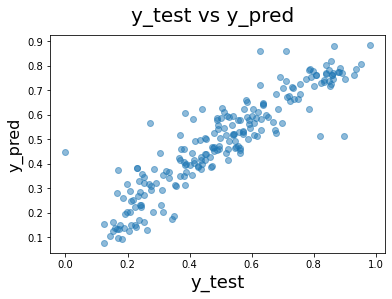

In [625]:

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [626]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(r2)

0.8282714014074744


In [627]:
lr_model.params

const           0.184713
yr              0.225736
workingday      0.045990
atemp           0.443822
hum            -0.155830
windspeed      -0.130517
season_2        0.149210
season_3        0.108364
season_4        0.222207
mnth_9          0.078192
mnth_11        -0.075917
mnth_12        -0.062721
weekday_6       0.052206
weathersit_2   -0.053653
weathersit_3   -0.211022
dtype: float64

## Residual Analysis

In [628]:
y_train_pred = lr_model.predict(X_train_SM)

C:\Users\Madham Vinay\anaconda3\envs\ztdl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

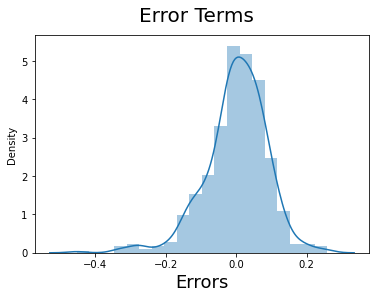

In [629]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

### Conclusion 


As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (atemp) - A coefficient value of ‘0.443822’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.443822 units.

Year (yr) - A coefficient value of ‘0.225736’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.225736 units.
Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.211022’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.225736 units.


The details of weathersit_1 & weathersit_3
weathersit_1: Clear, Few clouds, Partly cloudy, Partly cloudy
weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
The details of season1 & season4

season1: spring
season4: winter

Year (yr): The coefficient for 'yr' is positive (0.225736), indicating that the year has a positive effect on the bike rental count (cnt). This suggests that there is an increase in bike rentals from one year to the next.

Workingday: The coefficient for 'workingday' is positive (0.045990), indicating that the bike rental count tends to be slightly higher on working days compared to non-working days.

Season: The coefficients for seasons 2, 3, and 4 are positive (0.149210, 0.108364, 0.222207, respectively), suggesting that the bike rental count tends to increase in seasons 2, 3, and 4 compared to season 1 (which is likely the reference category).

Month: The coefficients for months 9, 11, and 12 are positive (0.078192, -0.075917, -0.062721, respectively), indicating some variation in bike rental count across different months.

Weekday: The coefficient for 'weekday_6' (Saturday) is positive (0.052206), suggesting that bike rental count tends to be slightly higher on Saturdays compared to other weekdays.

Weather Situation: The coefficients for 'weathersit_2' and 'weathersit_3' are negative (-0.053653 and -0.211022, respectively), indicating that the bike rental count tends to decrease under weather situations 2 and 3 compared to weather situation 1 (which is likely the reference category).

Overall, these coefficients provide insights into how different categorical variables influence the bike rental count. However, it's essential to interpret these coefficients in the context of the specific dataset and the way categorical variables were encoded.